In [20]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [21]:
df = pd.read_csv('../Datasets_complementarios/Air_Quality_20240228.csv')
df.head(3)

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375.0,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203.0,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375.0,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203.0,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375.0,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204.0,East New York,Annual Average 2015,01/01/2015,19.09,NaN


Se eliminan columnas innecesarias

In [22]:
df.drop(columns = ['Unique ID', 'Indicator ID', 'Geo Type Name', 'Geo Join ID', 'Time Period', 'Message'], inplace = True)

Se verifica el tipo de dato de las columnas

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            14298 non-null  object 
 1   Measure         14298 non-null  object 
 2   Measure Info    14298 non-null  object 
 3   Geo Place Name  14298 non-null  object 
 4   Start_Date      14298 non-null  object 
 5   Data Value      14298 non-null  float64
dtypes: float64(1), object(5)
memory usage: 760.3+ KB


Start_date es de tipo 'object', se transforma en tipo 'datetime'

In [24]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'])

Se arma el  dataset 'df_NY' solo con las zonas pertenecientes a la ciudad de New York

In [41]:
df_NY = df[(df['Geo Place Name'].isin(['East New York','Bronx', 'Manhattan'])) & (df['Name'] == 'Nitrogen dioxide (NO2)')]
df_NY.head()

,Name,Measure,Measure Info,Geo Place Name,Start_Date,Data Value
2,Nitrogen dioxide (NO2),Mean,ppb,East New York,2015-01-01,19.09
28,Nitrogen dioxide (NO2),Mean,ppb,East New York,2017-06-01,13.39
29,Nitrogen dioxide (NO2),Mean,ppb,East New York,2018-06-01,11.97
64,Nitrogen dioxide (NO2),Mean,ppb,Bronx,2013-12-01,19.80
119,Nitrogen dioxide (NO2),Mean,ppb,East New York,2010-12-01,30.26


Se selecciona el año de la columna 'Start_Date' y se inserta en una nueva columna y se borra la columna inicial

In [42]:
df_NY['year'] = df_NY['Start_Date'].dt.year
df_NY.drop(columns='Start_Date', inplace = True)
df_NY.head()

,Name,Measure,Measure Info,Geo Place Name,Data Value,year
2,Nitrogen dioxide (NO2),Mean,ppb,East New York,19.09,2015
28,Nitrogen dioxide (NO2),Mean,ppb,East New York,13.39,2017
29,Nitrogen dioxide (NO2),Mean,ppb,East New York,11.97,2018
64,Nitrogen dioxide (NO2),Mean,ppb,Bronx,19.80,2013
119,Nitrogen dioxide (NO2),Mean,ppb,East New York,30.26,2010


normalizacion de las columnas

In [43]:
df_NY = df_NY.rename(columns = {'Name': 'name', 'Measure': 'measure', 'Measure Info': 'measure_info',
     'Geo Place Name': 'place', 'Data Value':'data_value'})
df_NY.head(1)

,name,measure,measure_info,place,data_value,year
2,Nitrogen dioxide (NO2),Mean,ppb,East New York,19.09,2015


Verificacion de valores duplicados y se borran

In [44]:
df_NY.duplicated().value_counts()

False    117
True      39
Name: count, dtype: int64

In [45]:
df_NY.drop_duplicates(inplace= True)

¿Hay nulos?

In [47]:
df_NY.isna().sum()

name            0
measure         0
measure_info    0
place           0
data_value      0
year            0
dtype: int64

No hay valor nulos o faltantes

### Analisis descriptivo

In [48]:
df_NY.describe()

,data_value,year
count,117.000000,117.000000
mean,22.005812,2014.487179
std,5.791141,3.925196
min,10.420000,2008.000000
25%,17.730000,2011.000000
50%,21.710000,2015.000000
75%,25.830000,2018.000000
max,38.350000,2021.000000


* La media de emisiones de dioxido de Nitrogeno es 17.5 partes por billon

In [49]:
df_NY.head(5)

,name,measure,measure_info,place,data_value,year
2,Nitrogen dioxide (NO2),Mean,ppb,East New York,19.09,2015
28,Nitrogen dioxide (NO2),Mean,ppb,East New York,13.39,2017
29,Nitrogen dioxide (NO2),Mean,ppb,East New York,11.97,2018
64,Nitrogen dioxide (NO2),Mean,ppb,Bronx,19.80,2013
119,Nitrogen dioxide (NO2),Mean,ppb,East New York,30.26,2010


Text(0, 0.5, 'Dioxido de Nitrogeno (ppb)')

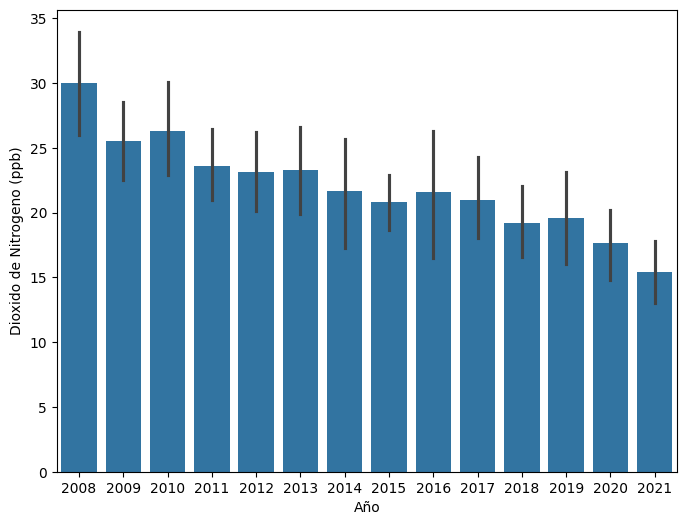

In [50]:
plt.figure(figsize=(8,6))
sns.barplot(x = df_NY.year, y = df_NY.data_value)
plt.xlabel('Año')
plt.ylabel('Dioxido de Nitrogeno (ppb)')

Se verifican valores Outliers

Text(0, 0.5, 'Dioxido de Nitrogeno (ppb)')

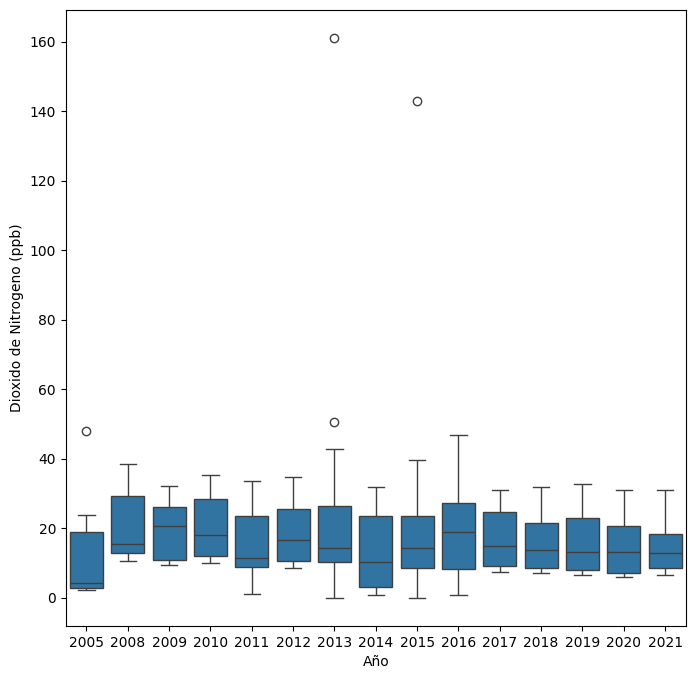

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(x = df_NY.year, y = df_NY.data_value)
plt.xlabel('Año')
plt.ylabel('Dioxido de Nitrogeno (ppb)')


In [38]:
df_NY.head(1)

,name,measure,measure_info,place,data_value,year
2,Nitrogen dioxide (NO2),Mean,ppb,East New York,19.09,2015


In [39]:
df_NY[df_NY['data_value'] > 40]

,name,measure,measure_info,place,data_value,year
7356,Boiler Emissions- Total NOx Emissions,Number per km2,number,Bronx,42.7,2013
7504,Boiler Emissions- Total NOx Emissions,Number per km2,number,Manhattan,161.1,2013
7993,Annual vehicle miles travelled (cars),million miles,per km2,Manhattan,43.7,2016
7994,Annual vehicle miles travelled (cars),million miles,per km2,Manhattan,48.0,2005
11186,Boiler Emissions- Total NOx Emissions,Number per km2,number,Manhattan,142.8,2015
13464,Boiler Emissions- Total SO2 Emissions,Number per km2,number,Manhattan,50.6,2013
15273,Annual vehicle miles traveled,million miles,per km2,Manhattan,46.7,2016


In [ ]:
df_NY.to_csv("../Datasets_procesados/calidad_aire_nitrogeno.csv")